# E-Commerce Customer Churn Prediction


#### Project Workflow
1. Understand the Dataset
- Review all columns and their meanings (you’ve already done this — great start!)
- Identify which variables are:
- Independent (features)
- Dependent (target)

2. Clean and Prepare the Data
- Check for missing values or anomalies (e.g., nulls sales)
- Create new features if needed:

3. Explore the Data (EDA)
Use visualizations to uncover patterns:
- 📉 Boxplots to see sales distribution by weather or promotion
- 📌 Correlation heatmap to see which features influence sales most

4. Model Sales Drivers
- Use regression models (e.g., Linear Regression, Random Forest, XGBoost) to predict daily_sales
- Evaluate feature importance: which variables drive sales the most?
- Try time series models (e.g., ARIMA, Prophet) if you're forecasting future sales

7. Present Your Work
- Deploy your project with streamlit
- Summarize key insights in a slide deck or report
- Include visuals, trends, and actionable takeaways


In [1]:
# Importing Libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)


In [3]:
# Load Dataset
df = pd.read_csv('ecommerce_customer_churn_dataset.csv')

raw_df = df.copy()

## Data Cleaning

In [4]:
df.head()

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,Total_Purchases,Average_Order_Value,Days_Since_Last_Purchase,Discount_Usage_Rate,Returns_Rate,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter
0,43.0,Male,France,Marseille,2.9,14.0,27.4,6.0,50.6,3.0,9.0,94.72,34.0,46.40,2.0,17.9,9.0,4.0,16.3,20.8,1.0,953.33,2278.0,0,Q1
1,36.0,Male,UK,Manchester,1.6,15.0,42.7,10.3,37.7,1.0,19.5,82.45,71.0,57.96,9.2,42.8,7.0,3.0,NaN,23.3,3.0,1067.47,3028.0,0,Q4
2,45.0,Female,Canada,Vancouver,2.9,10.0,24.8,1.6,70.9,1.0,9.1,165.52,11.0,12.24,11.5,0.0,4.0,1.0,NaN,8.8,NaN,1289.75,2317.0,0,Q4
3,56.0,Female,USA,New York,2.6,10.0,38.4,14.8,41.7,9.0,15.0,147.33,47.0,44.10,5.4,41.4,2.0,5.0,85.9,31.0,3.0,2340.92,2674.0,0,Q1
4,35.0,Male,India,Delhi,3.1,29.0,51.4,NaN,19.1,9.0,32.5,141.30,73.0,25.20,5.5,37.9,1.0,11.0,83.0,50.4,4.0,3041.29,5354.0,0,Q4


In [5]:
df.tail()

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,Total_Purchases,Average_Order_Value,Days_Since_Last_Purchase,Discount_Usage_Rate,Returns_Rate,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter
49995,38.0,Female,USA,Los Angeles,10.0,10.0,35.8,8.8,51.2,3.0,13.0,156.76,18.0,62.7,NaN,9.2,5.0,1.0,20.7,25.2,1.0,2365.98,3499.0,0,Q2
49996,37.0,Male,USA,Chicago,1.4,21.0,32.4,9.6,32.5,2.0,15.0,103.31,48.0,66.3,NaN,17.6,5.0,3.0,38.6,12.1,4.0,1293.60,3154.0,0,Q3
49997,44.0,Female,USA,Phoenix,2.8,19.0,40.3,10.4,50.6,1.0,12.0,139.44,7.0,NaN,10.7,25.2,4.0,6.0,59.9,NaN,1.0,1655.28,1622.0,0,Q1
49998,41.0,Female,USA,Chicago,2.9,17.0,29.9,10.1,60.8,1.0,12.0,111.58,72.0,74.2,2.5,34.6,5.0,2.0,NaN,14.1,3.0,1286.11,2634.0,0,Q2
49999,56.0,Male,UK,Leeds,2.2,2.0,18.2,NaN,46.0,0.0,9.0,132.67,37.0,2.9,3.5,0.0,7.0,0.0,0.0,4.2,1.0,1072.61,612.0,0,Q3


In [6]:
df.sample(10)

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,Total_Purchases,Average_Order_Value,Days_Since_Last_Purchase,Discount_Usage_Rate,Returns_Rate,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter
41911,69.0,Female,UK,Manchester,5.9,11.0,30.9,10.3,51.6,4.0,9.0,164.52,18.0,59.90,4.6,26.8,4.0,3.0,36.0,14.6,3.0,1385.20,1864.0,0,Q2
22035,39.0,Male,India,Mumbai,4.5,0.0,11.0,NaN,91.3,0.0,5.0,65.89,20.0,25.70,7.9,9.1,11.0,3.0,28.2,7.7,1.0,266.54,2203.0,1,Q3
35908,30.0,Male,Canada,Vancouver,0.8,14.0,20.0,2.4,69.6,2.0,8.0,174.55,NaN,54.20,6.9,5.9,4.0,2.0,37.1,13.1,3.0,1331.62,2258.0,0,Q3
14463,36.0,Male,USA,Houston,1.3,11.0,38.2,10.8,38.0,10.0,14.0,122.95,1.0,38.30,5.4,41.8,5.0,5.0,13.7,26.6,1.0,2051.58,1284.0,0,Q3
432,34.0,Female,USA,Los Angeles,3.1,12.0,NaN,12.0,73.1,8.0,10.0,206.00,53.0,50.30,0.8,16.4,4.0,2.0,36.6,24.7,3.0,2337.28,NaN,0,Q2
11247,36.0,Male,India,Chennai,2.2,29.0,51.9,NaN,29.5,12.0,24.0,66.61,9.0,9.00,0.8,62.4,1.0,8.0,78.0,44.7,2.0,1505.08,3756.0,0,Q2
32006,18.0,Male,Canada,Montreal,4.1,18.0,20.5,4.8,53.2,1.0,4.0,94.20,45.0,49.70,4.0,14.1,7.0,1.0,8.4,6.1,1.0,394.58,1799.0,0,Q2
19364,36.0,Female,UK,London,1.0,4.0,20.2,5.8,54.6,2.0,19.5,59.35,34.0,41.16,6.5,0.0,8.0,1.0,25.5,9.9,2.0,726.55,NaN,0,Q4
41184,43.0,Male,USA,Chicago,0.5,6.0,NaN,NaN,61.2,2.0,6.5,153.60,17.0,47.52,4.6,0.0,9.0,1.0,30.1,2.2,1.0,679.63,NaN,0,Q4
46796,46.0,Male,Canada,Vancouver,3.0,24.0,31.6,13.1,42.4,7.0,18.2,106.42,4.0,41.76,13.2,44.1,5.0,8.0,39.5,29.0,3.0,1254.49,3386.0,0,Q4


In [7]:
print("Dataset Information:")
print("="*70)
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            47505 non-null  float64
 1   Gender                         50000 non-null  object 
 2   Country                        50000 non-null  object 
 3   City                           50000 non-null  object 
 4   Membership_Years               50000 non-null  float64
 5   Login_Frequency                50000 non-null  float64
 6   Session_Duration_Avg           46601 non-null  float64
 7   Pages_Per_Session              47000 non-null  float64
 8   Cart_Abandonment_Rate          50000 non-null  float64
 9   Wishlist_Items                 46000 non-null  float64
 10  Total_Purchases                50000 non-null  float64
 11  Average_Order_Value            50000 non-null  float64
 12  Days_Since_Last_Purchase 

In [8]:
# Column names
print(f"\nTotal columns: {len(df.columns)}")
print("\nColumn names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")



Total columns: 25

Column names:
 1. Age
 2. Gender
 3. Country
 4. City
 5. Membership_Years
 6. Login_Frequency
 7. Session_Duration_Avg
 8. Pages_Per_Session
 9. Cart_Abandonment_Rate
10. Wishlist_Items
11. Total_Purchases
12. Average_Order_Value
13. Days_Since_Last_Purchase
14. Discount_Usage_Rate
15. Returns_Rate
16. Email_Open_Rate
17. Customer_Service_Calls
18. Product_Reviews_Written
19. Social_Media_Engagement_Score
20. Mobile_App_Usage
21. Payment_Method_Diversity
22. Lifetime_Value
23. Credit_Balance
24. Churned
25. Signup_Quarter


In [9]:
# Count of each data type
print("Data types distribution:")
print(df.dtypes.value_counts())

Data types distribution:
float64    20
object      4
int64       1
Name: count, dtype: int64


In [10]:
df.describe()

,Age,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,Total_Purchases,Average_Order_Value,Days_Since_Last_Purchase,Discount_Usage_Rate,Returns_Rate,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned
count,47505.000000,50000.000000,50000.000000,46601.000000,47000.000000,50000.000000,46000.000000,50000.000000,50000.000000,47000.000000,46500.000000,45509.000000,47472.000000,49832.000000,46500.000000,44000.000000,45000.000000,47500.000000,50000.000000,44500.000000,50000.000000
mean,37.802968,2.984009,11.624660,27.660754,8.737811,57.079973,4.298391,13.111576,123.117330,29.792872,41.997485,6.680913,20.937980,5.681831,2.853312,29.364466,19.371607,2.353874,1440.626292,1966.233258,0.289000
std,11.834668,2.059105,7.810657,10.871013,3.778220,16.282723,3.189754,7.017312,175.569714,29.695062,21.373642,6.143027,14.252561,2.676052,2.328948,20.574021,9.419252,1.110012,907.249443,1225.072166,0.453302
min,5.000000,0.100000,0.000000,1.000000,1.000000,0.000000,0.000000,-13.000000,26.380000,0.000000,0.240000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,29.000000,1.400000,6.000000,19.700000,6.000000,46.400000,2.000000,8.000000,87.050000,9.000000,25.300000,2.900000,9.900000,4.000000,1.000000,13.200000,12.500000,2.000000,789.817500,1049.000000,0.000000
50%,38.000000,2.500000,11.000000,26.800000,8.400000,58.100000,4.000000,12.000000,112.970000,21.000000,40.200000,5.400000,19.700000,5.000000,2.000000,27.600000,18.600000,2.000000,1243.415000,1896.000000,0.000000
75%,46.000000,4.000000,17.000000,34.700000,11.200000,68.700000,6.000000,17.000000,144.440000,41.000000,57.000000,9.100000,30.400000,7.000000,4.000000,43.100000,25.500000,3.000000,1874.000000,2791.000000,1.000000
max,200.000000,10.000000,46.000000,75.600000,24.100000,143.743350,28.000000,128.700000,9666.379178,287.000000,116.640000,99.615734,91.700000,21.000000,21.000000,100.000000,61.900000,5.000000,8987.240000,7197.000000,1.000000


In [11]:
# Check for Duplicates 
df.duplicated().sum()

if df.duplicated().sum() > 0:
    print("Duplicate Rows:")
    display(df[df.duplicated()])
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [12]:
# Check for Columns with Missing Values
df.isnull().sum()[df.isnull().sum() > 0]

Age                              2495
Session_Duration_Avg             3399
Pages_Per_Session                3000
Wishlist_Items                   4000
Days_Since_Last_Purchase         3000
Discount_Usage_Rate              3500
Returns_Rate                     4491
Email_Open_Rate                  2528
Customer_Service_Calls            168
Product_Reviews_Written          3500
Social_Media_Engagement_Score    6000
Mobile_App_Usage                 5000
Payment_Method_Diversity         2500
Credit_Balance                   5500
dtype: int64

### Handle Missing Values

In [13]:
# Create working copy
df_cleaned = df.copy()

In [14]:
# Separate column types
numerical_cols = df_cleaned.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns.tolist()

if 'Churned' in numerical_cols:
    numerical_cols.remove('Churned')

In [15]:
# Fill missing numerical colums with median
for col in numerical_cols:
    if df_cleaned[col].isnull().sum() > 0:
        df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)
           
# Fill missing categorical colums with mode
for col in categorical_cols:
    if df_cleaned[col].isnull().sum() > 0:
        df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)


C:\Users\odebi\AppData\Local\Temp\ipykernel_13716\3795788519.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)


In [16]:
# Verify
print(f"\nRemaining missing values: {df_cleaned.isnull().sum().sum()}")


Remaining missing values: 0


In [17]:
print(f"\nCleaning Summary:")
print(f"Original: {df.shape}")
print(f"Cleaned:  {df_cleaned.shape}")
print(f"Rows removed: {df.shape[0] - df_cleaned.shape[0]}")
print("\n✅ Data cleaning complete!")



Cleaning Summary:
Original: (50000, 25)
Cleaned:  (50000, 25)
Rows removed: 0

✅ Data cleaning complete!


## Exploratory Data Analysis (EDA)

- Target distribution - Check class imbalance
- Correlations - Which features matter most for churn
- Key visualizations - Only the important ones (correlation matrix, boxplots)
- Categorical analysis - Churn rates by category
- Summary - Key takeaways

Explain the thought process for using median and mode filling the missing numerical and categorical data rspectively in data cleaning

### Target Variable Distribution

In [18]:
# Check churn distribution
churn_counts = df_cleaned['Churned'].value_counts()
churn_pct = df_cleaned['Churned'].value_counts(normalize=True) * 100

print("Churn Distribution:")
print(f"Active (0):  {churn_counts[0]:,} ({churn_pct[0]:.2f}%)")
print(f"Churned (1): {churn_counts[1]:,} ({churn_pct[1]:.2f}%)")
print(f"Imbalance ratio: {churn_counts[0]/churn_counts[1]:.2f}:1")


Churn Distribution:
Active (0):  35,550 (71.10%)
Churned (1): 14,450 (28.90%)
Imbalance ratio: 2.46:1


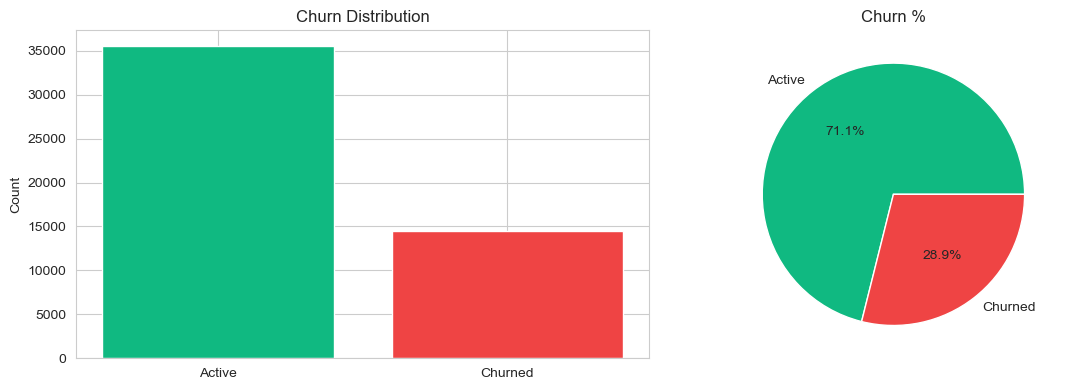

In [19]:
# Visualize
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].bar(['Active', 'Churned'], churn_counts, color=['#10b981', '#ef4444'])
axes[0].set_ylabel('Count')
axes[0].set_title('Churn Distribution')

axes[1].pie(churn_counts, labels=['Active', 'Churned'], autopct='%1.1f%%',
            colors=['#10b981', '#ef4444'])
axes[1].set_title('Churn %')

plt.tight_layout()
plt.show()

 ### Numerical Features Overview

In [20]:
# Basic stats for numerical features
print("Numerical Features Summary:")
df_cleaned[numerical_cols].describe()

Numerical Features Summary:


,Age,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,Total_Purchases,Average_Order_Value,Days_Since_Last_Purchase,Discount_Usage_Rate,Returns_Rate,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,37.812800,2.984009,11.624660,27.602240,8.717542,57.079973,4.274520,13.111576,123.117330,29.265300,41.871661,6.565861,20.875388,5.679540,2.793580,29.152730,19.294446,2.33618,1440.626292,1958.507600
std,11.535688,2.059105,7.810657,10.497234,3.663996,16.282723,3.060573,7.017312,175.569714,28.866043,20.617080,5.872081,13.890225,2.671844,2.256482,19.308632,8.938875,1.08465,907.249443,1155.938248
min,5.000000,0.100000,0.000000,1.000000,1.000000,0.000000,0.000000,-13.000000,26.380000,0.000000,0.240000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000
25%,30.000000,1.400000,6.000000,20.200000,6.200000,46.400000,2.000000,8.000000,87.050000,9.000000,26.500000,3.100000,10.500000,4.000000,1.000000,15.300000,13.200000,2.00000,789.817500,1164.000000
50%,38.000000,2.500000,11.000000,26.800000,8.400000,58.100000,4.000000,12.000000,112.970000,21.000000,40.200000,5.400000,19.700000,5.000000,2.000000,27.600000,18.600000,2.00000,1243.415000,1896.000000
75%,45.000000,4.000000,17.000000,34.000000,11.000000,68.700000,6.000000,17.000000,144.440000,39.000000,55.560000,8.600000,29.700000,7.000000,4.000000,40.700000,24.600000,3.00000,1874.000000,2664.000000
max,200.000000,10.000000,46.000000,75.600000,24.100000,143.743350,28.000000,128.700000,9666.379178,287.000000,116.640000,99.615734,91.700000,21.000000,21.000000,100.000000,61.900000,5.00000,8987.240000,7197.000000


### Correlation Martix

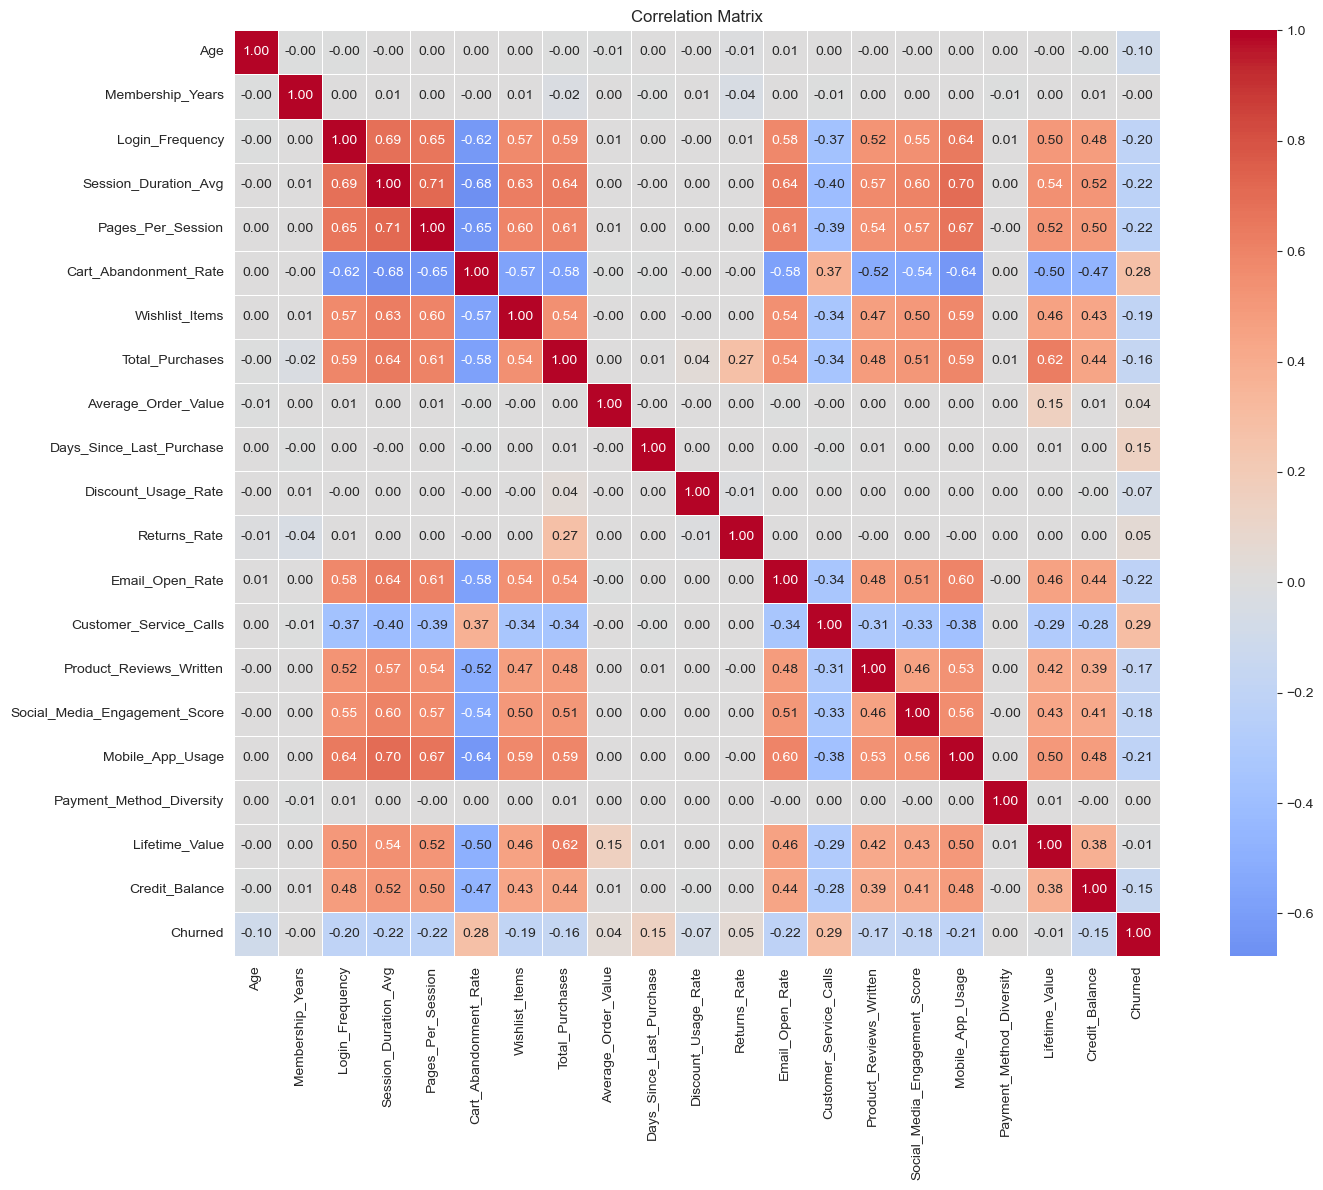

In [21]:
# correlation matrix
plt.figure(figsize=(16, 12))
corr_matrix = df_cleaned[numerical_cols + ['Churned']].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

Top 10 Positive Correlations (higher value → more churn):
Customer_Service_Calls      0.290384
Cart_Abandonment_Rate       0.277963
Days_Since_Last_Purchase    0.148015
Returns_Rate                0.051122
Average_Order_Value         0.042288
Payment_Method_Diversity    0.004767
Membership_Years           -0.000623
Lifetime_Value             -0.010684
Discount_Usage_Rate        -0.074152
Age                        -0.100511
dtype: float64

Top 10 Negative Correlations (higher value → less churn):
Credit_Balance                  -0.147990
Total_Purchases                 -0.160029
Product_Reviews_Written         -0.174459
Social_Media_Engagement_Score   -0.179829
Wishlist_Items                  -0.189569
Login_Frequency                 -0.204379
Mobile_App_Usage                -0.211376
Email_Open_Rate                 -0.216233
Session_Duration_Avg            -0.219512
Pages_Per_Session               -0.224708
dtype: float64


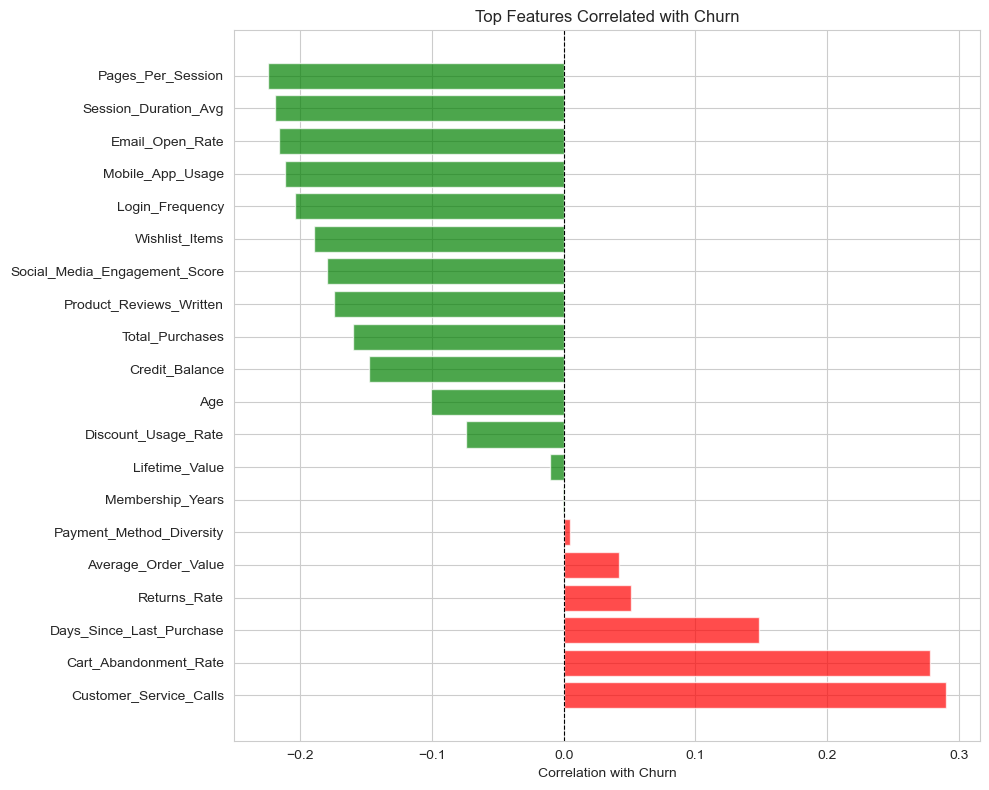

In [22]:
# Correlation with target(churn)
churn_corr = df_cleaned[numerical_cols].corrwith(df_cleaned['Churned']).sort_values(ascending=False)

print("Top 10 Positive Correlations (higher value → more churn):")
print(churn_corr.head(10))
print("\nTop 10 Negative Correlations (higher value → less churn):")
print(churn_corr.tail(10))

# Visualize top correlations
top_features = pd.concat([churn_corr.head(10), churn_corr.tail(10)])

plt.figure(figsize=(10, 8))
colors = ['red' if x > 0 else 'green' for x in top_features.values]
plt.barh(range(len(top_features)), top_features.values, color=colors, alpha=0.7)
plt.yticks(range(len(top_features)), top_features.index)
plt.xlabel('Correlation with Churn')
plt.title('Top Features Correlated with Churn')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()

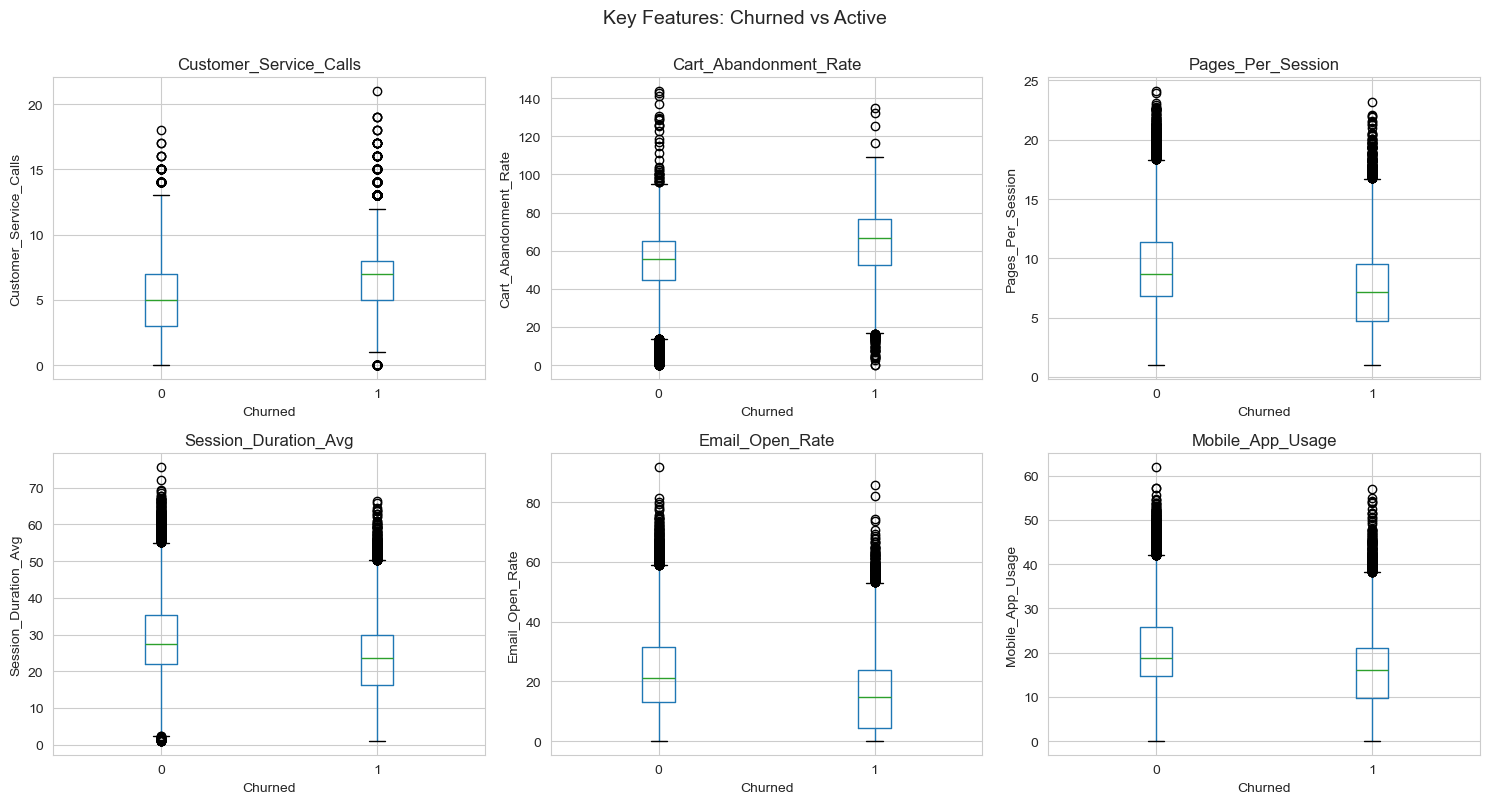

In [23]:
# Compare Key features between churned and active customers
top_6_features = churn_corr.abs().sort_values(ascending=False).head(6).index

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()

for i, feature in enumerate(top_6_features):
    df_cleaned.boxplot(column=feature, by='Churned', ax=axes[i])
    axes[i].set_title(f'{feature}')
    axes[i].set_xlabel('Churned')
    axes[i].set_ylabel(feature)

plt.suptitle('Key Features: Churned vs Active', fontsize=14, y=1.00)
plt.tight_layout()
plt.show()


### Categorical Features Overview


In [24]:
# Check categorical distributions
print("Categorical Features:")
for col in categorical_cols:
    print(f"\n{col}: {df_cleaned[col].nunique()} unique values")
    print(df_cleaned[col].value_counts().head())


Categorical Features:

Gender: 3 unique values
Gender
Female    25116
Male      23947
Other       937
Name: count, dtype: int64

Country: 8 unique values
Country
USA          17384
UK            7534
Canada        6023
Germany       4925
Australia     4061
Name: count, dtype: int64

City: 40 unique values
City
Houston        3549
Phoenix        3490
New York       3477
Chicago        3475
Los Angeles    3393
Name: count, dtype: int64

Signup_Quarter: 4 unique values
Signup_Quarter
Q3    12558
Q2    12521
Q4    12468
Q1    12453
Name: count, dtype: int64


#### Churn Rate by Category



Churn Rate by Gender (Top 10):
        count  churn_rate
Gender                   
Other     937   31.270011
Female  25116   28.973563
Male    23947   28.730112


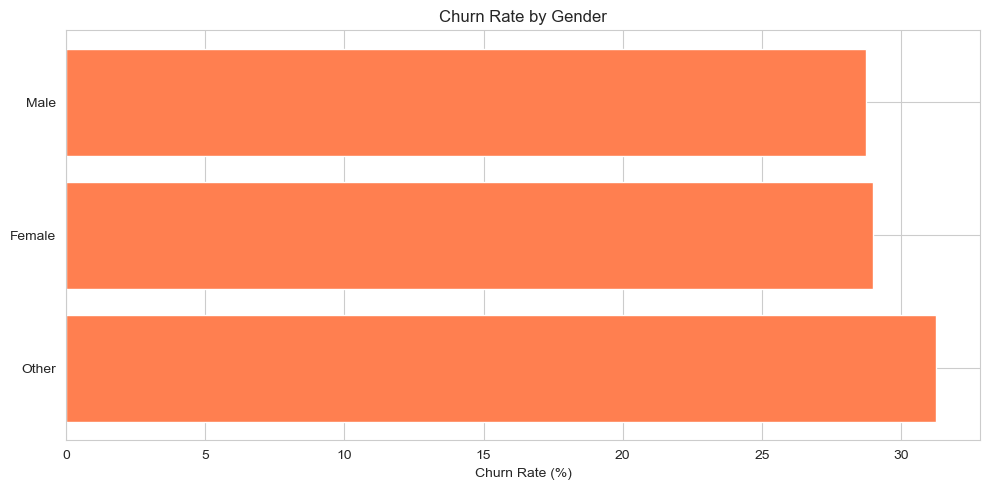


Churn Rate by Country (Top 10):
           count  churn_rate
Country                     
Australia   4061   29.894115
Canada      6023   29.354142
USA        17384   29.084215
India       3512   29.014806
Germany     4925   28.832487
UK          7534   28.789488
Japan       2548   27.825746
France      4013   27.286319


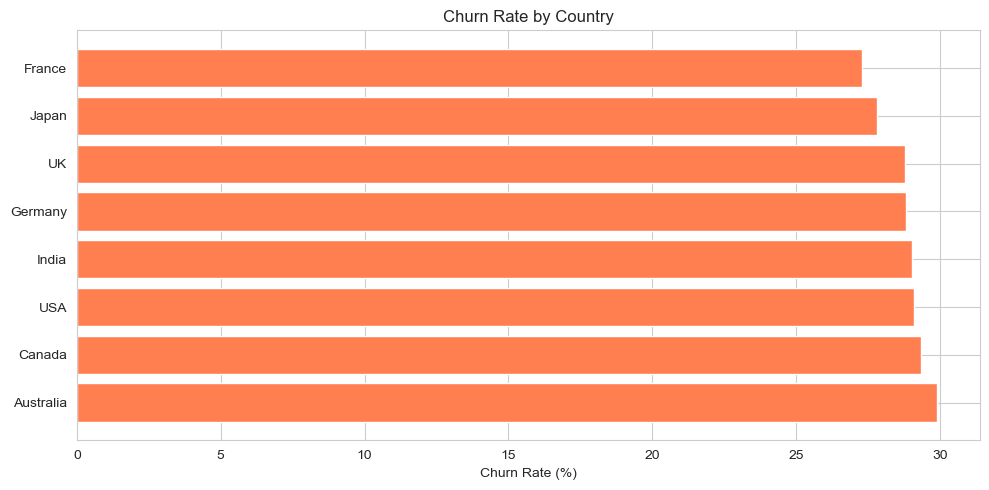


Churn Rate by City (Top 10):
           count  churn_rate
City                        
Melbourne    805   31.801242
Kyoto        507   31.163708
Perth        817   31.089351
Sydney       828   30.555556
Mumbai       694   30.547550
Delhi        693   30.303030
Brisbane     794   30.100756
Hamburg     1026   30.019493
Hyderabad    691   29.956585
Toronto     1209   29.942101


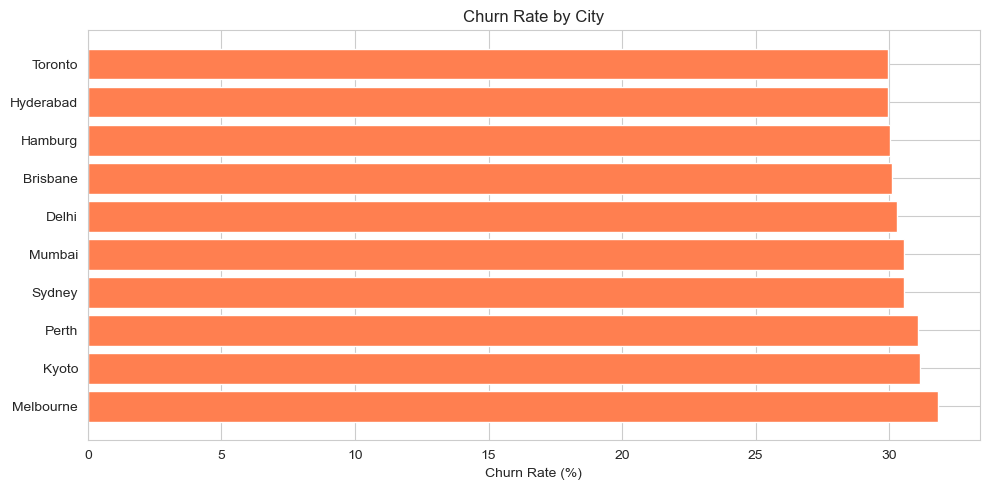

In [25]:
# Churn rate by key categorical features
for col in categorical_cols[:3]:  # First 3 categorical features
    churn_by_cat = df_cleaned.groupby(col)['Churned'].agg(['sum', 'count', 'mean'])
    churn_by_cat['churn_rate'] = churn_by_cat['mean'] * 100
    churn_by_cat = churn_by_cat.sort_values('churn_rate', ascending=False).head(10)
    
    print(f"\nChurn Rate by {col} (Top 10):")
    print(churn_by_cat[['count', 'churn_rate']])
    
    # Visualize
    plt.figure(figsize=(10, 5))
    plt.barh(range(len(churn_by_cat)), churn_by_cat['churn_rate'], color='coral')
    plt.yticks(range(len(churn_by_cat)), churn_by_cat.index)
    plt.xlabel('Churn Rate (%)')
    plt.title(f'Churn Rate by {col}')
    plt.tight_layout()
    plt.show()


###  Summary of EDA

In [26]:
print("\n" + "="*60)
print("EDA SUMMARY")
print("="*60)
print(f"""
Target Distribution:
  - Churn rate: {churn_pct[1]:.2f}%
  - Imbalance: {churn_counts[0]/churn_counts[1]:.2f}:1

Top Positive Correlations (features that predict churn):
{churn_corr.head(3).to_dict()}

Top Negative Correlations (features that prevent churn):
{churn_corr.tail(3).to_dict()}

Key Insights:
  - Dataset is imbalanced → will need SMOTE
  - Clear correlation patterns identified
  - Ready for preprocessing and modeling
""")
print("="*60)
print("✅ EDA Complete!")


EDA SUMMARY

Target Distribution:
  - Churn rate: 28.90%
  - Imbalance: 2.46:1

Top Positive Correlations (features that predict churn):
{'Customer_Service_Calls': 0.29038437273776735, 'Cart_Abandonment_Rate': 0.2779625253196606, 'Days_Since_Last_Purchase': 0.1480152778049941}

Top Negative Correlations (features that prevent churn):
{'Email_Open_Rate': -0.216232548839605, 'Session_Duration_Avg': -0.21951233580811574, 'Pages_Per_Session': -0.22470794995049453}

Key Insights:
  - Dataset is imbalanced → will need SMOTE
  - Clear correlation patterns identified
  - Ready for preprocessing and modeling

✅ EDA Complete!


## Data Preprocessing

1. Feature Engineering - Creating new useful features
2. Encoding Categorical Variables - Converting text to numbers
3. Feature Selection - Choosing which features to use
4. Train-Test Split - Splitting data for training and testing
5. Feature Scaling - Standardizing numerical features
6. Handling Class Imbalance - Using SMOTE to balance the dataset


`NB: Use Class weights and SMOTE when creating your Model to see which performs better`

In [27]:
# Create a copy for Processing to preserve cleaned data
df_processed = df_cleaned.copy()

print(f"Original shape: {df_processed.shape}")
print(f"Original features: {df_processed.shape[1]}")

Original shape: (50000, 25)
Original features: 25


### Feature Engineering;

`Engagement_Score` = Login_Frequency × Session_Duration_Avg  
`Recent_Purchase` = if Days_Since_Last_Purchase <= 30  
`High_Value_Customer`= if Lifetime_Value > median  
`Active_User` = Login_Frequency > 15 

In [28]:
# 1. Engagement Score
# Combines login frequency and session duration to measure overall engagement

df_processed['Engagement_Score'] = (
    df_processed['Login_Frequency'] * df_processed['Session_Duration_Avg'] / 100
)

print("✓ Created: Engagement_Score")
print(f"  Range: {df_processed['Engagement_Score'].min():.2f} to {df_processed['Engagement_Score'].max():.2f}")
print(f"  Mean: {df_processed['Engagement_Score'].mean():.2f}")


✓ Created: Engagement_Score
  Range: 0.00 to 29.16
  Mean: 3.77


In [29]:
# 2. Recent Purchase Flag
# Binary flag: 1 if purchased in last 30 days, 0 otherwise

# %%
df_processed['Recent_Purchase'] = (
    df_processed['Days_Since_Last_Purchase'] <= 30
).astype(int)

print("✓ Created: Recent_Purchase")
print(f"  Customers with recent purchase: {df_processed['Recent_Purchase'].sum():,}")
print(f"  Percentage: {(df_processed['Recent_Purchase'].sum() / len(df_processed)) * 100:.2f}%")

✓ Created: Recent_Purchase
  Customers with recent purchase: 33,108
  Percentage: 66.22%


In [30]:
# 3. High Value Customer
# Binary flag: 1 if lifetime value above median, 0 otherwise


median_ltv = df_processed['Lifetime_Value'].median()

df_processed['High_Value_Customer'] = (
    df_processed['Lifetime_Value'] > median_ltv
).astype(int)

print("✓ Created: High_Value_Customer")
print(f"  Median Lifetime Value: ${median_ltv:.2f}")
print(f"  High value customers: {df_processed['High_Value_Customer'].sum():,}")
print(f"  Percentage: {(df_processed['High_Value_Customer'].sum() / len(df_processed)) * 100:.2f}%")

✓ Created: High_Value_Customer
  Median Lifetime Value: $1243.41
  High value customers: 25,000
  Percentage: 50.00%


In [31]:
print("Login Frequency Statistics:")
print(df_cleaned['Login_Frequency'].describe())

print("\nDistribution:")
print(f"Min: {df_cleaned['Login_Frequency'].min()}")
print(f"25th percentile: {df_cleaned['Login_Frequency'].quantile(0.25)}")
print(f"Median (50th): {df_cleaned['Login_Frequency'].median()}")
print(f"75th percentile: {df_cleaned['Login_Frequency'].quantile(0.75)}")
print(f"Max: {df_cleaned['Login_Frequency'].max()}")

Login Frequency Statistics:
count    50000.000000
mean        11.624660
std          7.810657
min          0.000000
25%          6.000000
50%         11.000000
75%         17.000000
max         46.000000
Name: Login_Frequency, dtype: float64

Distribution:
Min: 0.0
25th percentile: 6.0
Median (50th): 11.0
75th percentile: 17.0
Max: 46.0


In [32]:
# 4. Active User Flag
# Binary flag: 1 if login frequency above 15 (threshold based on your data)

login_threshold = df_cleaned['Login_Frequency'].median()  # This will be 11

df_processed['Active_User'] = (
    df_processed['Login_Frequency'] > login_threshold
).astype(int)

print(f"✓ Created: Active_User (threshold: {login_threshold})")
print(f"  Active users (>11 logins): {df_processed['Active_User'].sum():,}")
print(f"  Percentage: {(df_processed['Active_User'].sum() / len(df_processed)) * 100:.2f}%")

✓ Created: Active_User (threshold: 11.0)
  Active users (>11 logins): 23,596
  Percentage: 47.19%


In [33]:
# Summary of New Features

new_features = [
    'Engagement_Score', 
    'Recent_Purchase', 
    'High_Value_Customer',
    'Active_User'
]

print("\n" + "="*60)
print("FEATURE ENGINEERING SUMMARY")
print("="*60)
print(f"\nOriginal features: {df_cleaned.shape[1]}")
print(f"New features created: {len(new_features)}")
print(f"Total features now: {df_processed.shape[1]}")

print("\nNew features:")
for i, feature in enumerate(new_features, 1):
    print(f"  {i}. {feature}")



FEATURE ENGINEERING SUMMARY

Original features: 25
New features created: 4
Total features now: 29

New features:
  1. Engagement_Score
  2. Recent_Purchase
  3. High_Value_Customer
  4. Active_User


In [34]:
# Preview New Features

print("\nSample of engineered features:")
df_processed[new_features].head(10)



Sample of engineered features:


,Engagement_Score,Recent_Purchase,High_Value_Customer,Active_User
0,3.836,0,0,1
1,6.405,0,0,1
2,2.480,1,1,0
3,3.840,0,1,0
4,14.906,0,1,1
5,1.314,1,1,0
6,11.136,1,1,1
7,3.374,1,1,1
8,3.752,1,0,1
9,4.069,0,0,1


In [35]:
# Quick Check: Correlation with Churn

# Check if new features correlate with churn
print("\nNew Features Correlation with Churn:")
new_feature_corr = df_processed[new_features].corrwith(df_processed['Churned']).sort_values(ascending=False)
print(new_feature_corr)

print("\n✅ Feature Engineering Complete!")
print("Next: Encoding Categorical Variables")


New Features Correlation with Churn:
High_Value_Customer   -0.041386
Recent_Purchase       -0.110469
Active_User           -0.165649
Engagement_Score      -0.185253
dtype: float64

✅ Feature Engineering Complete!
Next: Encoding Categorical Variables


### Encoding Categorical Variables
Gender Label Encoding
Country label encoding
City
Signup_Quarter

In [59]:
print(categorical_cols)

['Gender', 'Country', 'City', 'Signup_Quarter']


In [56]:
print("Categorical features - unique counts:")
for col in categorical_cols:
    print(f"{col}: {df_cleaned[col].nunique()} unique values")

Categorical features - unique counts:
Gender: 3 unique values
Country: 8 unique values
City: 40 unique values
Signup_Quarter: 4 unique values


In [60]:
# Check if churn rate varies by city before deciding which encoding to use

city_churn = df_cleaned.groupby('City')['Churned'].agg(['mean', 'count']).sort_values('mean', ascending=False)
print("Top 10 cities by churn rate:")
print(city_churn.head(10))
print("\nBottom 10 cities by churn rate:")
print(city_churn.tail(10))

Top 10 cities by churn rate:
               mean  count
City                      
Melbourne  0.318012    805
Kyoto      0.311637    507
Perth      0.310894    817
Sydney     0.305556    828
Mumbai     0.305476    694
Delhi      0.303030    693
Brisbane   0.301008    794
Hamburg    0.300195   1026
Hyderabad  0.299566    691
Toronto    0.299421   1209

Bottom 10 cities by churn rate:
                mean  count
City                       
Bangalore   0.272206    698
Chennai     0.271739    736
Manchester  0.271574   1576
Lyon        0.269880    830
Frankfurt   0.267637    893
Adelaide    0.259486    817
Nagoya      0.256809    514
Nice        0.254068    799
Tokyo       0.253259    537
Toulouse    0.252761    815
